In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import kenlm
lm = kenlm.LanguageModel('kenlm.arpa')
%matplotlib inline

Load data
---------

In [2]:
tags = pd.read_csv('taggedColorMsgs2.csv', escapechar='\\')
tags.head()

,gameid,time,roundNum,sender,contents,source,lemmas,numSuper,numComp
0,1124-1,1459877203862,1,speaker,The darker blue one,human,"[(u'The', u'DT'), (u'darker', u'JJR'), (u'blue...",0,1.0
1,1124-1,1459877214034,2,speaker,purple,human,"[(u'purple', u'JJ')]",0,0.0
2,1124-1,1459877223719,3,speaker,Medium pink,human,"[(u'Medium', u'NN'), (u'pink', u'NN')]",0,0.0
3,1124-1,1459877227433,3,speaker,the medium dark one,human,"[(u'the', u'DT'), (u'medium', u'NN'), (u'dark'...",0,0.0
4,1124-1,1459877240480,4,speaker,lime,human,"[(u'lime', u'NN')]",0,0.0


In [3]:
def join_with_tilde(s):
    if isinstance(s, list):
        return ' ~ '.join(s)
    else:
        return ''

old_eval = eval

def shim_eval(s):
    val = old_eval(s.replace('\\', '\\\\'))
    if isinstance(val, list):
        return val
    else:
        return []
    
eval = shim_eval


def join_lemmas_lists(r):
    result = []
    for row in r:
        val = old_eval(row.replace('\\', '\\\\'))
        if isinstance(val, list):
            result.extend(val)
        else:
            import warnings
            warnings.warn('not a list: %s' % (val,))
    return repr(result)

def join_with_tagged(output, tags):
    return (pd.merge(output, tags, on=['gameid', 'roundNum'])
              .query("sender == 'speaker'")[['gameid', 'roundNum', 'condition', 'outcome',
                                             'contents', 'lemmas', 'numSuper', 'numComp']]
              .groupby(['gameid', 'roundNum'])
              .agg({'condition': 'first', 'outcome': 'first',
                    'contents': join_with_tilde,
                    'lemmas': join_lemmas_lists,
                    'numSuper': 'sum', 'numComp': 'sum'})
              .reset_index())

In [4]:
l0 = join_with_tagged(pd.read_csv('modelOutput/listener_big_l0_untuned_clickedObj.csv', escapechar='\\'), tags)
l0.head()

/juicer/u87/u/nlp/packages/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:27: UserWarning: not a list: 0


,gameid,roundNum,numSuper,lemmas,condition,numComp,outcome,contents
0,0022-7,1,1,"[(u'blue', u'JJ'), (u',', u','), (u'sorry', u'...",closer,0.0,True,
1,0022-7,2,0,"[(u'brighter', u'JJR'), (u'blue', u'JJ'), (u'o...",closer,1.0,True,
2,0022-7,3,0,"[(u'long', u'RB'), (u'day', u'NN'), (u'here', ...",further,0.0,True,
3,0022-7,4,0,"[(u'more', u'JJR'), (u'of', u'IN'), (u'a', u'D...",further,1.0,True,
4,0022-7,5,0,"[(u'blue', u'JJ'), (u'blue', u'JJ')]",equal,0.0,True,


In [5]:
l2 = join_with_tagged(pd.read_csv('modelOutput/listener_big_l2_heldout_clickedObj.csv', escapechar='\\'), tags)
l2.head()

/juicer/u87/u/nlp/packages/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:27: UserWarning: not a list: 0


,gameid,roundNum,numSuper,lemmas,condition,numComp,outcome,contents
0,0022-7,1,1,"[(u'blue', u'JJ'), (u',', u','), (u'sorry', u'...",closer,0.0,True,
1,0022-7,2,0,"[(u'brighter', u'JJR'), (u'blue', u'JJ'), (u'o...",closer,1.0,True,
2,0022-7,3,0,"[(u'long', u'RB'), (u'day', u'NN'), (u'here', ...",further,0.0,True,
3,0022-7,4,0,"[(u'more', u'JJR'), (u'of', u'IN'), (u'a', u'D...",further,1.0,True,
4,0022-7,5,0,"[(u'blue', u'JJ'), (u'blue', u'JJ')]",equal,0.0,True,


In [6]:
u = pd.read_csv('humanOutput/colorReferenceMessage2.csv', escapechar='\\')
u.head()

,gameid,time,roundNum,sender,contents
0,1124-1,1459877203862,1,speaker,The darker blue one
1,1124-1,1459877214034,2,speaker,purple
2,1124-1,1459877223719,3,speaker,Medium pink
3,1124-1,1459877227433,3,speaker,the medium dark one
4,1124-1,1459877240480,4,speaker,lime


In [7]:
h = join_with_tagged(pd.read_csv('humanOutput/colorReferenceClicks2.csv', escapechar='\\'), tags)
h.head()

/juicer/u87/u/nlp/packages/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:27: UserWarning: not a list: 0


,gameid,roundNum,numSuper,lemmas,condition,numComp,outcome,contents
0,0002-7,1,0,"[(u'purpleish', u'NN')]",closer,0.0,False,
1,0002-7,2,0,"[(u'grey', u'JJ')]",further,0.0,True,
2,0002-7,3,0,"[(u'not', u'RB'), (u'green', u'JJ'), (u'and', ...",closer,0.0,True,
3,0002-7,4,0,"[(u'grey', u'JJ'), (u'with', u'IN'), (u'a', u'...",closer,0.0,False,
4,0002-7,5,0,"[(u'darker', u'JJR'), (u'of', u'IN'), (u'the',...",closer,1.0,True,


Overall accuracy values
-----------------------

In [8]:
sum(h['outcome']) * 100.0 / len(h)

89.866504854368927

In [9]:
sum(l0['outcome']) * 100.0 / len(l0)

83.258190562067924

In [10]:
sum(l2['outcome']) * 100.0 / len(l2)

83.979561166215817

Accuracy by condition
---

In [11]:
def accuracy_by_condition(output):
    conditions = [output.query("condition == '{}'".format(cname))
                  for cname in ('equal', 'further', 'closer')]
    return [sum(c['outcome']) * 100.0 / len(c)
            for c in conditions]

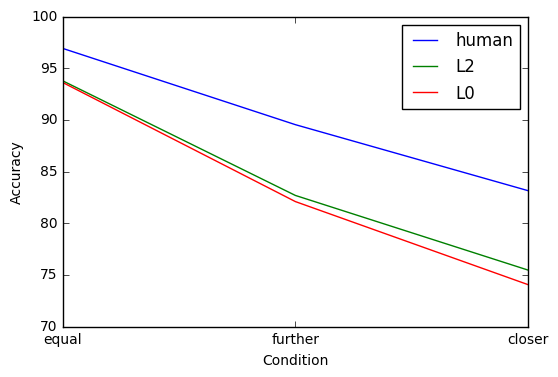

In [12]:
for model in [h, l2, l0]:
    plt.plot(np.arange(3) - 1, accuracy_by_condition(model))
plt.legend(['human', 'L2', 'L0'])
plt.xticks([-1, 0, 1], ['equal', 'further', 'closer'])
plt.xlabel('Condition')
plt.ylabel('Accuracy')
plt.savefig(os.path.expanduser('~/allListenerAccuracy.eps'), format='eps', bbox_inches='tight')
plt.show()

Distribution of POS tags
---

In [13]:
from collections import Counter
tag_dist = Counter([pos for sent in tags['lemmas'] for word, pos in shim_eval(sent)])
tag_vals, counts = zip(*tag_dist.most_common())
pd.DataFrame({'tags': tag_vals, 'counts': counts})

,counts,tags
0,81146,JJ
1,44949,NN
2,21813,DT
3,13563,RB
4,9527,IN
5,8170,CD
6,7339,.
7,6388,","
8,6148,JJR
9,5744,VBZ


Distribution of words
---

In [14]:
from collections import Counter
tag_dist = Counter([(word.lower(), pos) for sent in tags['lemmas'] for word, pos in shim_eval(sent)])
tag_vals, counts = zip(*tag_dist.most_common())
pd.DataFrame({'tags': tag_vals, 'counts': counts})

,counts,tags
0,16466,"(the, DT)"
1,15030,"(green, JJ)"
2,11349,"(purple, JJ)"
3,8999,"(not, RB)"
4,8527,"(blue, JJ)"
5,6388,"(,, ,)"
6,6267,"(one, CD)"
7,5411,"(grey, JJ)"
8,5393,"(bright, JJ)"
9,5083,"(pink, NN)"


Distribution of adverbs
---

In [15]:
from collections import Counter
tag_dist = Counter([word.lower() for sent in tags['lemmas'] for word, pos in shim_eval(sent) if pos == 'RB'])
tag_vals, counts = zip(*tag_dist.most_common())
pd.DataFrame({'tags': tag_vals, 'counts': counts})

,counts,tags
0,8999,not
1,408,yes
2,325,almost
3,315,again
4,299,slightly
5,277,n't
6,223,too
7,217,so
8,194,very
9,155,really


Accuracy by various features
---

In [16]:
def accuracy_by_feature(output, func, bounds):
    output['feature_val'] = [func(row) for i, row in output.iterrows()]
    group_nums = sorted(set(output['feature_val']))
    groups = [output.query("feature_val == {}".format(repr(num)))
              for num in group_nums]
    accs = np.array([sum(g['outcome']) * 100.0 / len(g) for g in groups])
    errs = np.array([3000.0 / len(g) for g in groups])
    if bounds is None:
        lower_errs = errs
        upper_errs = errs
    else:
        lower_errs = np.minimum(accs - bounds[0], errs)
        upper_errs = np.minimum(bounds[1] - accs, errs)
    return group_nums, accs, [lower_errs, upper_errs]

def plot_accuracy_by_feature(func, outputs, keys, colors, save=None, bounds=(50, 100)):
    width = 0.2
    all_nums = set()
    for i, (output, color) in enumerate(zip(outputs, colors)):
        nums, accs, errs = accuracy_by_feature(output, func, bounds=bounds)
        plt.bar(np.array(nums) + i * width, accs, width, color=color, yerr=errs, ecolor='k')
        if bounds is not None:
            plt.ylim(bounds)
        all_nums.update(nums)
    all_nums = sorted(all_nums)
    plt.xticks(np.array(all_nums) + len(outputs) * 0.5 * width, [str(n) for n in all_nums])
    plt.legend(keys, loc='lower left')
    if save is not None:
        plt.savefig(os.path.expanduser(save), format='eps', bbox_inches='tight')

In [17]:
def all(sent):
    return 0

In [18]:
def num_negations(sent):
    return sum([w.lower() in ('not', "n't") for w, _ in eval(sent)])

def ind_negations(sent):
    return int(sum([w.lower() in ('not', "n't") for w, _ in eval(sent)]) > 0)

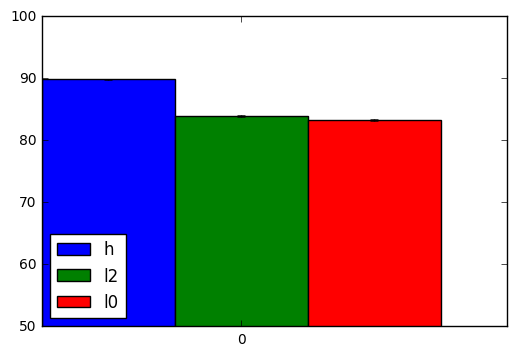

In [19]:
plot_accuracy_by_feature(all, [h, l2, l0], ['h', 'l2', 'l0'], ['b', 'g', 'r'])

In [20]:
plot_accuracy_by_feature(num_negations, [h, l2, l0], ['h', 'l2', 'l0'], ['b', 'g', 'r'])

TypeError: eval() arg 1 must be a string or code object

In [ ]:
plot_accuracy_by_feature(ind_negations, [h, l2, l0], ['h', 'l2', 'l0'], ['b', 'g', 'r'])

In [ ]:
def num_nouns(sent):
    return sum([p in ("NN", "NNS") for w, p in eval(sent)])

plot_accuracy_by_feature(num_nouns, [h, l2, l0], ['h', 'l2', 'l0'], ['b', 'g', 'r'])

In [ ]:
def ind_noun(sent):
    return int(sum([p in ("NN", "NNS") for w, p in eval(sent)]) > 0)

plot_accuracy_by_feature(ind_noun, [h, l2, l0], ['h', 'l2', 'l0'], ['b', 'g', 'r'])

In [ ]:
def ind_dt(sent):
    return int(sum([p == 'DT' for w, p in eval(sent)]) > 0)

plot_accuracy_by_feature(ind_dt, [h, l2, l0], ['h', 'l2', 'l0'], ['b', 'g', 'r'])

In [ ]:
def ind_superlative(sent):
    return int(sum([p == "JJS" for w, p in eval(sent)]) > 0)

plot_accuracy_by_feature(ind_superlative, [h, l2, l0], ['h', 'l2', 'l0'], ['b', 'g', 'r'])

In [ ]:
def ind_comparative(sent):
    return int(sum([p == "JJR" for w, p in eval(sent)]) > 0)

plot_accuracy_by_feature(ind_comparative, [h, l2, l0], ['h', 'l2', 'l0'], ['b', 'g', 'r'])

In [ ]:
def length_bucket(sent):
    return int(len(eval(sent)) > 6)

plot_accuracy_by_feature(length_bucket, [h, l2, l0], ['human', 'L2', 'L0'], ['b', 'g', 'r'], save='~/byLength.eps')

In [ ]:
def length_cross_negations(sent):
    return 2 * length_bucket(sent) + ind_negations(sent)

plot_accuracy_by_feature(length_cross_negations, [h, l2, l0], ['h', 'l2', 'l0'], ['b', 'g', 'r'])

In [ ]:
def length_cross_comparative(sent):
    return 2 * length_bucket(sent) + ind_comparative(sent)

plot_accuracy_by_feature(length_cross_comparative, [h, l2, l0], ['h', 'l2', 'l0'], ['b', 'g', 'r'])

In [ ]:
def length_cross_noun(sent):
    return 2 * length_bucket(sent) + ind_noun(sent)

plot_accuracy_by_feature(length_cross_noun, [h, l2, l0], ['h', 'l2', 'l0'], ['b', 'g', 'r'])

In [ ]:
def length_cross_dt(sent):
    return 2 * length_bucket(sent) + ind_dt(sent)

plot_accuracy_by_feature(length_cross_dt, [h, l2, l0], ['h', 'l2', 'l0'], ['b', 'g', 'r'])

When do the two models differ?
---

In [ ]:
def drop_irrelevant(df):
    return df.drop(['numComp', 'numSuper', 'feature_val'], 1)

improved = (pd.merge(drop_irrelevant(l0), drop_irrelevant(l2), on=['gameid', 'roundNum'], suffixes=['_l0', '_l2'])
              .drop(['contents_l2', 'lemmas_l2', 'condition_l2'], 1)
              .query('outcome_l2 > outcome_l0'))
declined = (pd.merge(drop_irrelevant(l0), drop_irrelevant(l2), on=['gameid', 'roundNum'], suffixes=['_l0', '_l2'])
              .drop(['contents_l2', 'lemmas_l2', 'condition_l2'], 1)
              .query('outcome_l2 < outcome_l0'))
len(improved), len(declined)

In [ ]:
improved

In [ ]:
declined

In [131]:
def count_tags(output):
    all_tags = [p for sent in output['lemmas_l0'] for w, p in eval(sent)]
    return pd.Series(all_tags).value_counts() / (1.0 * len(all_tags))

pd.DataFrame(list(count_tags(improved).sub(count_tags(declined), fill_value=0.0)
                                      .iteritems()),
             columns=['tag', 'relRate']).sort_values(by='relRate')

,tag,relRate
10,FW,-0.009452
22,PRP,-0.008116
11,IN,-0.006317
17,NN,-0.006043
7,CD,-0.003403
36,VBZ,-0.002955
25,RBR,-0.002638
30,UH,-0.002421
33,VBG,-0.002159
23,PRP$,-0.001865


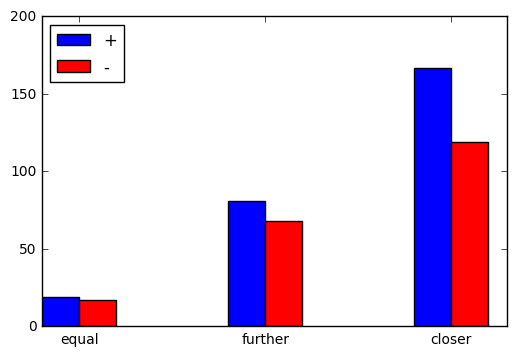

In [175]:
def accuracy_by_feature(output, func, bounds):
    output['feature_val'] = [func(row) for i, row in output.iterrows()]
    group_nums = sorted(set(output['feature_val']))
    groups = [output.query("feature_val == {}".format(repr(num)))
              for num in group_nums]
    accs = np.array([sum(g['outcome']) for g in groups])
    errs = np.array([30.0 for g in groups])
    if bounds is None:
        lower_errs = errs
        upper_errs = errs
    else:
        lower_errs = np.minimum(accs - bounds[0], errs)
        upper_errs = np.minimum(bounds[1] - accs, errs)
    return group_nums, accs, [lower_errs, upper_errs]

def plot_num_examples_by_feature(func, outputs, keys, colors, save=None, bounds=(50, 100)):
    width = 0.2
    all_nums = set()
    for i, (output, color) in enumerate(zip(outputs, colors)):
        nums, accs, errs = accuracy_by_feature(output, func, bounds=bounds)
        plt.bar(np.array(nums) + i * width, accs, width, color=color, ecolor='k')
        if bounds is not None:
            plt.ylim(bounds)
        all_nums.update(nums)
    all_nums = sorted(all_nums)
    plt.xticks(np.array(all_nums) + len(outputs) * 0.5 * width, ('equal', 'further', 'closer'))
    plt.legend(keys, loc='upper left')
    if save is not None:
        plt.savefig(os.path.expanduser(save), format='eps', bbox_inches='tight')

def ind_condition(row):
    return ('equal', 'further', 'closer').index(row['condition_l0'])

improved['outcome'] = improved['outcome_l2']
declined['outcome'] = declined['outcome_l0']
plot_num_examples_by_feature(ind_condition, [improved, declined], ['+', '-'], ['b', 'r'], bounds=(0, 200))

WordNet color terms
---

In [132]:
from nltk.corpus import wordnet as wn

In [133]:
def all_hyponyms(syn):
    hypo_syns = syn.closure(lambda s: s.hyponyms())
    return [str(lemma.name()).replace('_', ' ')
            for s in hypo_syns for lemma in s.lemmas()]

wn_color_terms = set(all_hyponyms(wn.synset('color.n.01')))

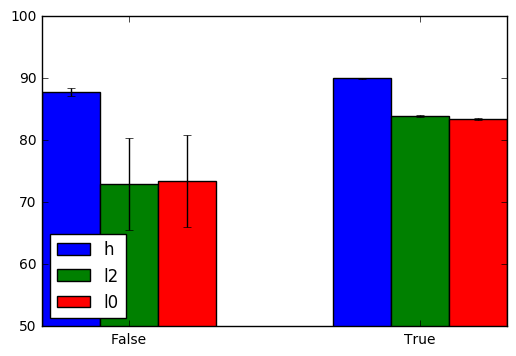

In [134]:
def ind_color_term(sent):
    space_joined = ' '.join(w for w, p in eval(sent))
    return any(c in space_joined for c in wn_color_terms)

plot_accuracy_by_feature(ind_color_term, [h, l2, l0], ['h', 'l2', 'l0'], ['b', 'g', 'r'])

Length and specificity
---

In [135]:
# http://stackoverflow.com/a/21276920/4481448

def rand_jitter(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

def jitter(x, y, s=20, c='b', marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, hold=None, **kwargs):
    return plt.scatter(rand_jitter(x), rand_jitter(y), s=s, c=c, marker=marker, cmap=cmap, norm=norm, vmin=vmin, vmax=vmax, alpha=alpha, linewidths=linewidths, verts=verts, hold=hold, **kwargs)

In [136]:
def length_cost(row):
    return len(eval(row['lemmas']))

def cost_by_condition(cost_fn, output):
    conditions = [['equal', 'further', 'closer'].index(row['condition'])
                  for index, row in output.iterrows()]
    length = [cost_fn(row) for index, row in output.iterrows()]
    return np.array(conditions), np.array(length)

def plot_cost_by_condition(cost_fn, output):
    conditions, length = cost_by_condition(cost_fn, output)
    jitter(conditions, length)
    plt.xticks(sorted(set(conditions)), ['equal', 'further', 'closer'])
    plt.xlabel('Condition')
    plt.ylabel('Length')
    plt.show()

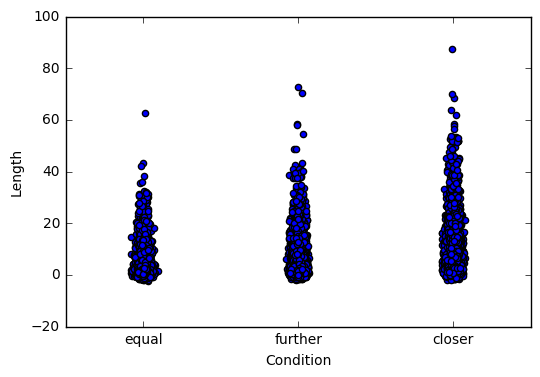

In [137]:
plot_cost_by_condition(length_cost, h)

In [138]:
from sklearn.linear_model import LogisticRegression

def accuracy_by_cost(cost_fn, output):
    length = np.array([cost_fn(row) for index, row in output.iterrows()])
    accuracy = output['outcome'].astype(np.int)
    return length, accuracy

def plot_logistic_reg(length, accuracy):
    # TODO
    lr = LogisticRegression(C=1., solver='lbfgs')
    lr.fit(np.log(np.maximum(1., length[:, np.newaxis])), accuracy)
    inputs = np.arange(1., 130., 0.1)
    probs = lr.predict_proba(np.log(inputs[:, np.newaxis]))[:, 1]
    plt.plot(inputs, probs)

def plot_accuracy_by_cost(cost_fn, output, plot_fit_fn):
    length, accuracy = accuracy_by_cost(cost_fn, output)
    plt.scatter(length, accuracy)
    plot_fit_fn(length, accuracy)
    plt.xlabel('Length')
    plt.ylabel('Accuracy')
    plt.show()

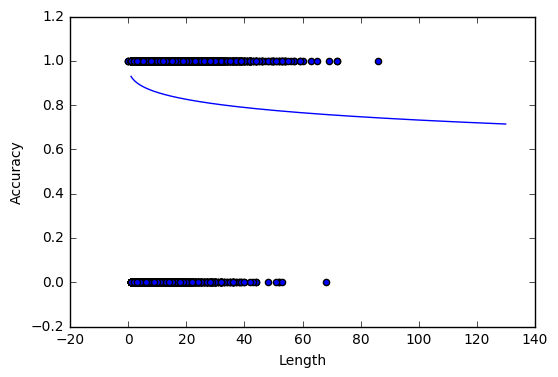

In [139]:
plot_accuracy_by_cost(length_cost, h, plot_logistic_reg)

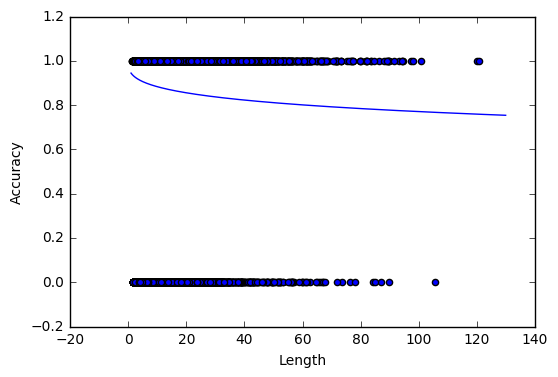

In [140]:
def lm_score_cost(row):
    words = [w for w, t in eval(row['lemmas'])]
    return -lm.score(' '.join(words))

plot_accuracy_by_cost(lm_score_cost, h, plot_logistic_reg)

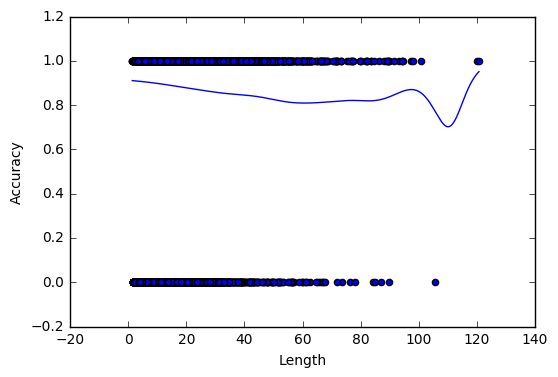

In [141]:
class LocalRegression(object):
    def __init__(self, x, y, alpha=None):
        self.x = np.array(x)
        self.y = np.array(y)
        if alpha is not None:
            self.alpha = alpha
        else:
            self.alpha = self.tune_alpha()

    def tune_alpha(self):
        # Find the scale to search over
        diffs = np.abs(self.x[:, np.newaxis] - self.x[np.newaxis, :])
        #diffs[diffs <= 1e-6] = float('inf')
        #min_alpha = np.min(diffs)
        min_alpha = np.mean(diffs) / 10.
        max_alpha = (np.max(self.x) - np.min(self.x)) / 2.
        # Search on linearly spaced intervals
        search_vals = np.linspace(min_alpha, max_alpha, 10)
        # Minimize LOOCV cross-entropy
        costs = []
        for alpha in search_vals:
            c = self.cost(alpha)
            if not np.isfinite(c):
                c = float('inf')
            costs.append(c)
            print('%.3e: %.3e' % (alpha, c))
        return search_vals[np.argmin(costs)]
    
    def cost(self, alpha):
        n = len(self.x)
        z = (self.x[:, np.newaxis] - self.x[np.newaxis, :]) / alpha
        weights = np.exp(-z ** 2.0)
        # Leave-one-out cross-validation 
        weights[np.arange(n), np.arange(n)] = 0.
        probas = (weights * self.y[np.newaxis, :]).sum(axis=1) / weights.sum(axis=1)
        return -(self.y * np.log(probas) + (1. - self.y) * np.log(1. - probas)).sum()

    def predict_proba(self, x):
        z = (x[:, np.newaxis] - self.x[np.newaxis, :]) / self.alpha
        weights = np.exp(-z ** 2.0)
        return (weights * self.y[np.newaxis, :]).sum(axis=1) / weights.sum(axis=1)

def plot_local(cost, accuracy):
    reg = LocalRegression(cost, accuracy, alpha=10.0)
    inputs = np.arange(np.min(cost), np.max(cost), 0.1)
    probs = reg.predict_proba(inputs)
    plt.plot(inputs, probs)

plot_accuracy_by_cost(lm_score_cost, h, plot_local)

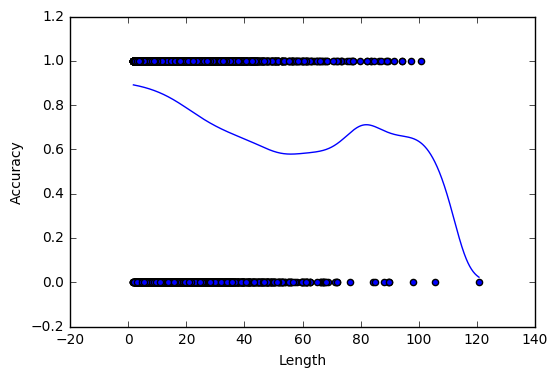

In [142]:
plot_accuracy_by_cost(lm_score_cost, l0, plot_local)

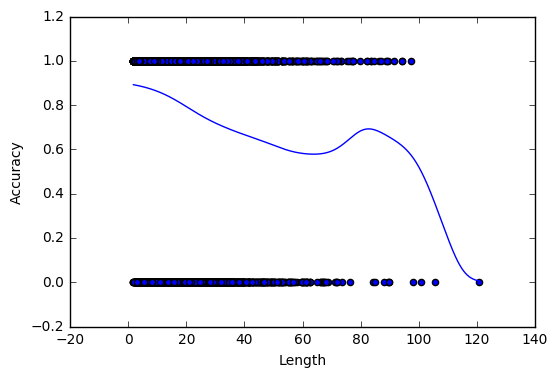

In [143]:
plot_accuracy_by_cost(lm_score_cost, l2, plot_local)

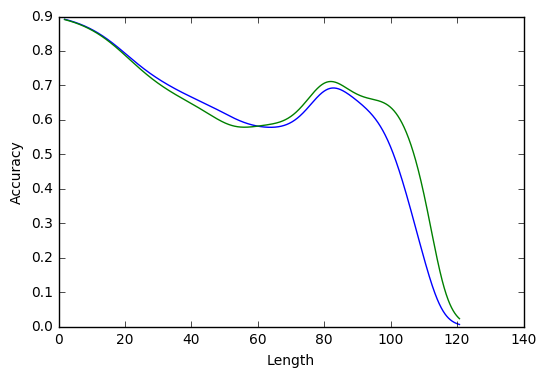

In [144]:
def compare_local(cost_fn, output1, output2, plot_fit_fn):
    cost, accuracy1 = accuracy_by_cost(cost_fn, output1)
    _, accuracy2 = accuracy_by_cost(cost_fn, output2)
    plot_fit_fn(cost, accuracy1)
    plot_fit_fn(cost, accuracy2)
    plt.xlabel('Length')
    plt.ylabel('Accuracy')
    plt.show()
    
compare_local(lm_score_cost, l2, l0, plot_local)

Plots of only examples that differ in accuracy
---

In [145]:
l0_diff = l0[l0['outcome'] != l2['outcome']]
l2_diff = l2[l0['outcome'] != l2['outcome']]

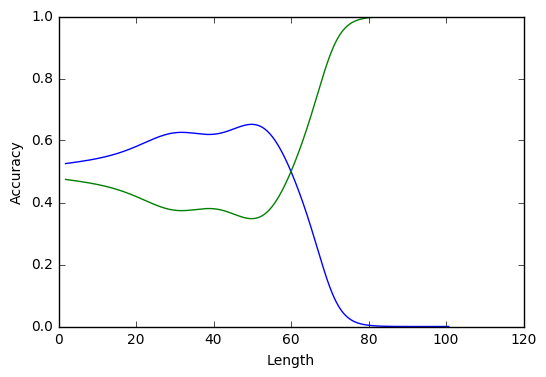

In [146]:
compare_local(lm_score_cost, l2_diff, l0_diff, plot_local)

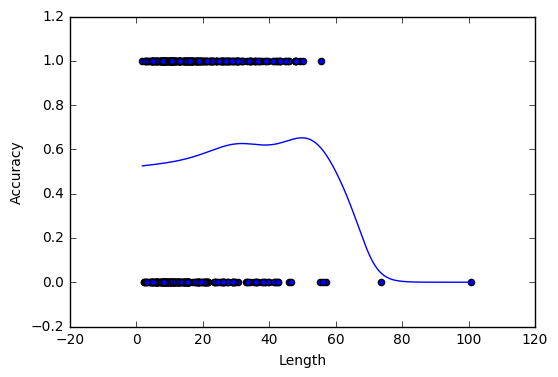

In [147]:
plot_accuracy_by_cost(lm_score_cost, l2_diff, plot_local)

In [148]:
def resid_cost(row):
    # TODO: update the coefficients for the new language model
    a, b = (1.369379215037215, 1.3627133364900235)
    lc = length_cost(row)
    expected = a * 1.0 * lc + b
    return lm_score_cost(row) - expected

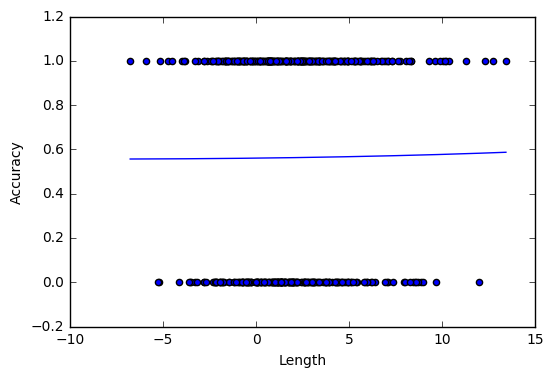

In [149]:
plot_accuracy_by_cost(resid_cost, l2_diff, plot_local)

(1.5367764492399365, 1.6934459948611931)


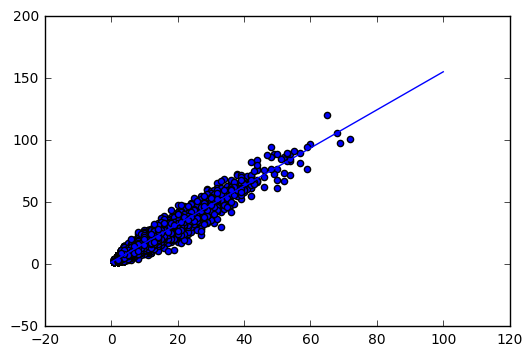

In [150]:
def plot_lm_scores():
    lens = [length_cost(row) for i, row in l2.iterrows()]
    scores = [lm_score_cost(row) for i, row in l2.iterrows()]
    a, b = np.polyfit(lens, scores, 1)
    print((a, b))
    plt.scatter(lens, scores)
    plt.plot([0., 100.], [b, 100. * a + b])
    plt.show()

plot_lm_scores()